In [2]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from multipeak_fit_lt1 import *
from pathlib import Path
from pyperclip import copy
import seaborn as sns
# plt.style.use('./norm.mplstyle')
import plotly.graph_objects as go
from matplotlib.pylab import cm

Populating the interactive namespace from numpy and matplotlib


# Multipeak Fitting Code for ESR and ODMR spectra

# Fitting ESR spectra

 Use for gaussian and Lorentzian fits ONLY

<Figure size 432x288 with 0 Axes>

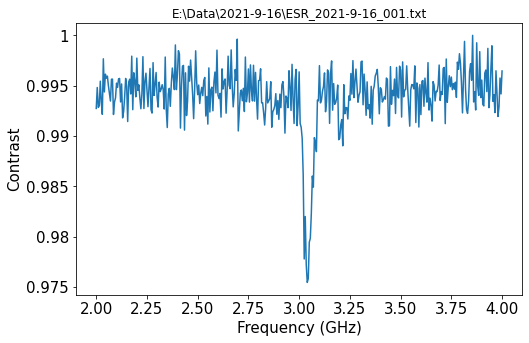

<Figure size 432x288 with 0 Axes>

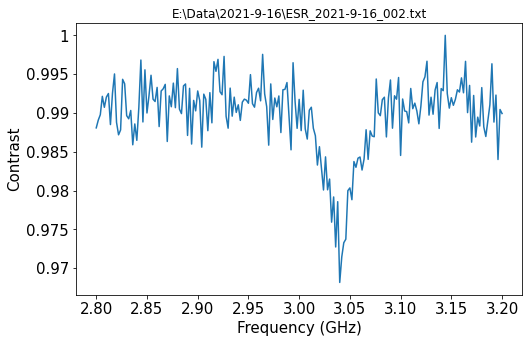

<Figure size 432x288 with 0 Axes>

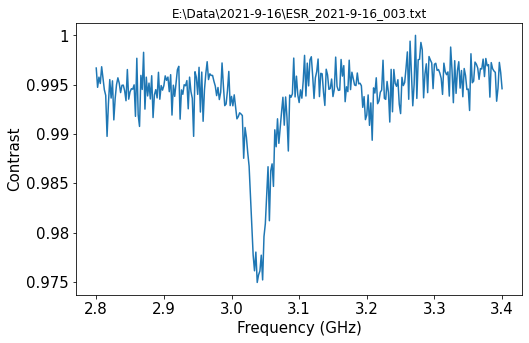

<Figure size 432x288 with 0 Axes>

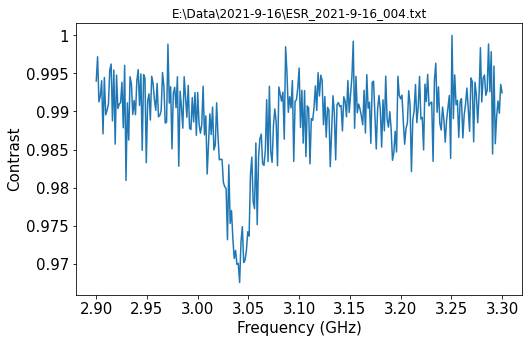

<Figure size 432x288 with 0 Axes>

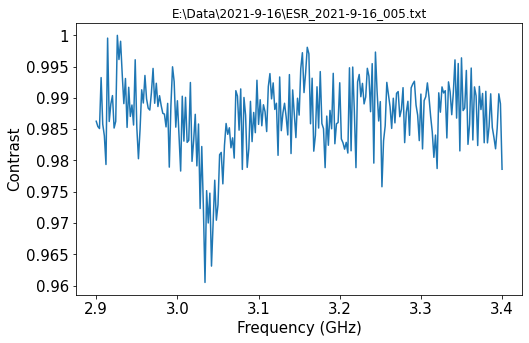

<Figure size 432x288 with 0 Axes>

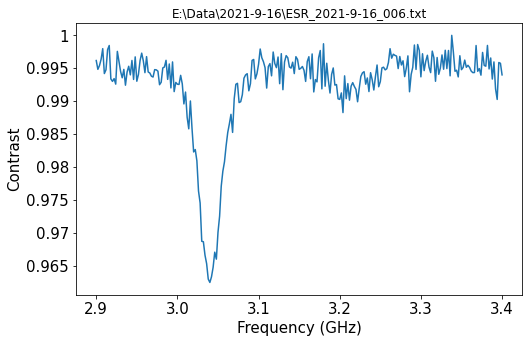

<Figure size 432x288 with 0 Axes>

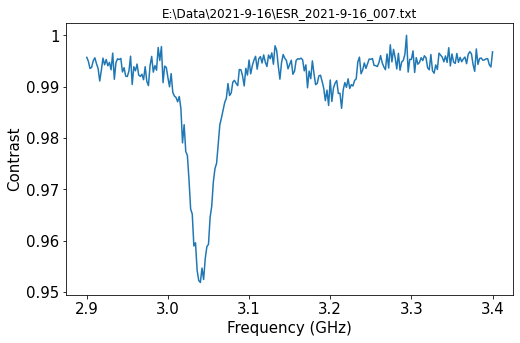

<Figure size 432x288 with 0 Axes>

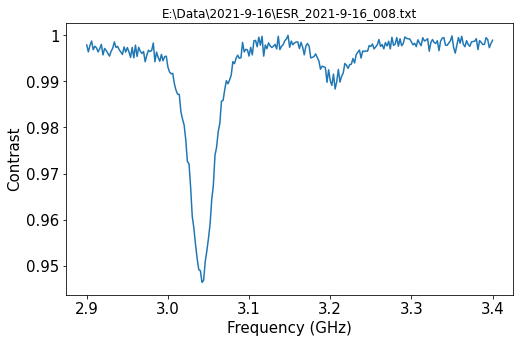

<Figure size 432x288 with 0 Axes>

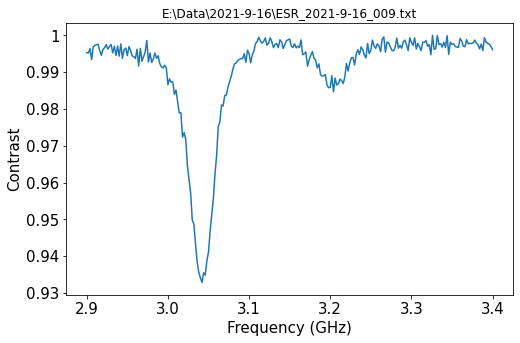

<Figure size 432x288 with 0 Axes>

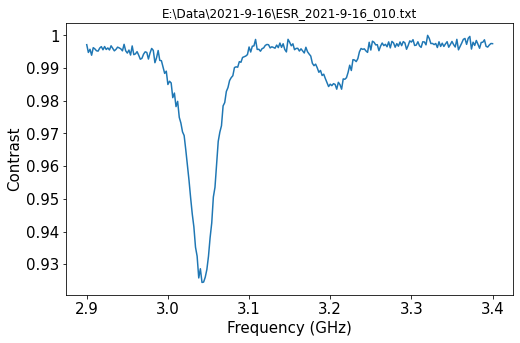

<Figure size 432x288 with 0 Axes>

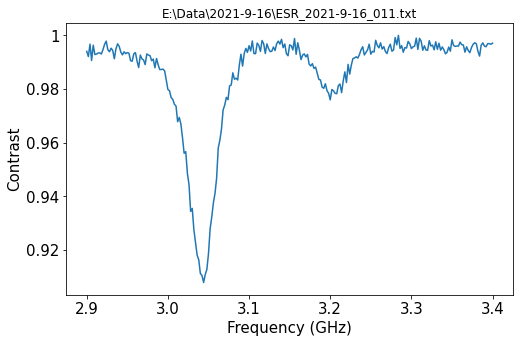

<Figure size 432x288 with 0 Axes>

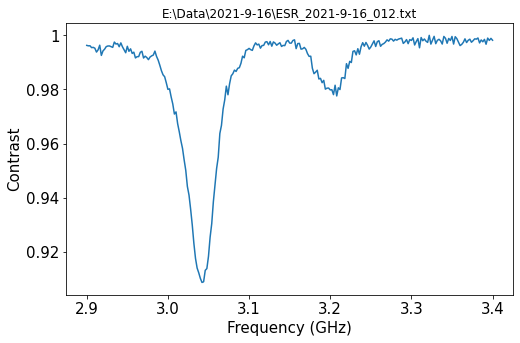

<Figure size 432x288 with 0 Axes>

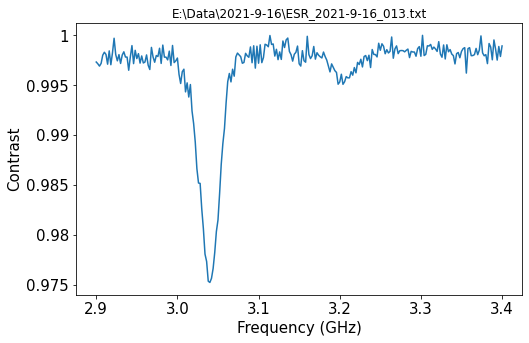

E:\Data\2021-9-16\ESR_2021-9-16_001.txt
E:\Data\2021-9-16\ESR_2021-9-16_002.txt
E:\Data\2021-9-16\ESR_2021-9-16_003.txt
E:\Data\2021-9-16\ESR_2021-9-16_004.txt
E:\Data\2021-9-16\ESR_2021-9-16_005.txt
E:\Data\2021-9-16\ESR_2021-9-16_006.txt
E:\Data\2021-9-16\ESR_2021-9-16_007.txt
E:\Data\2021-9-16\ESR_2021-9-16_008.txt
E:\Data\2021-9-16\ESR_2021-9-16_009.txt
E:\Data\2021-9-16\ESR_2021-9-16_010.txt
E:\Data\2021-9-16\ESR_2021-9-16_011.txt
E:\Data\2021-9-16\ESR_2021-9-16_012.txt
E:\Data\2021-9-16\ESR_2021-9-16_013.txt


In [24]:
date= '2021-9-16' # the date on which the data was collected
ESR_files= extractESRFiles(date, makePlots= True)
for f in ESR_files:
    print(f)

 The following cell will ask you for the data number of the files you want to fit. I anticipate some of the ESR will be trial runs so you don't want to fit to them.

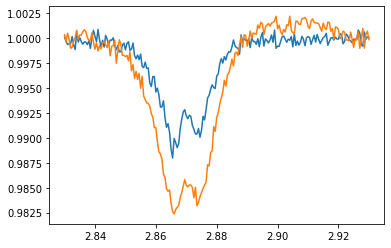

In [33]:
# # save data as csv
# fname= ESR_files[0]
# label= 'loading10-pressurepoint5-50-GPa-450.csv'
# xVals,yVals,errVals= readFile(fname)
# dat= pd.DataFrame({'frequency': xVals, 'contrast': yVals, 'error': errVals})
# dat.to_csv('./loading10/%s'%label, index= False)
for fname in ESR_files: 
    x,y,e= readFile(fname)
    y= y/np.mean(y[-10:])
    plt.plot(x,y)

 DONT GO THROUGH THE FOLLOWING CELL IF YOU WANT TO FIT ALL THE SPECTRA ON THAT DAY

In [25]:
indices= np.fromstring(input('Enter the indices of the files to be fit:'),sep=',',dtype=int)
ESR_files= [ESR_files[i-1] for i in indices]
print('Selected ESR files to be fit!')
for f in ESR_files:
    print(f)

Enter the indices of the files to be fit:13
Selected ESR files to be fit!
E:\Data\2021-9-16\ESR_2021-9-16_013.txt


Enter initial parameters separated by comma (leave blank and press enter if you want to skip this fit):
Background,A_peak1,sigma_peak1,x0_peak1,... 
1,-0.001,0.01,3.05,-0.001,0.01,3.2
[ 1.00e+00 -1.00e-03  1.00e-02  3.05e+00 -1.00e-03  1.00e-02  3.20e+00]
Fits plotted in E:\Data\2021-9-16\ESR_2021-9-16_013.png
Fits saved to E:\Data\2021-9-16\ESR_2021-9-16_013_fit_params.npz


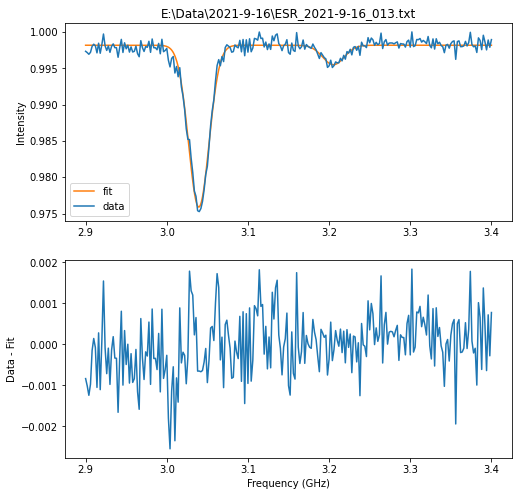

Satisfied with fit? [y/n]: 5


Enter initial parameters separated by comma (leave blank and press enter if you want to skip this fit):
Background,A_peak1,sigma_peak1,x0_peak1,... 
1,-0.001,0.01,3.05,-0.001,0.01,3.2
[ 1.00e+00 -1.00e-03  1.00e-02  3.05e+00 -1.00e-03  1.00e-02  3.20e+00]
Fits plotted in E:\Data\2021-9-16\ESR_2021-9-16_013.png
Fits saved to E:\Data\2021-9-16\ESR_2021-9-16_013_fit_params.npz


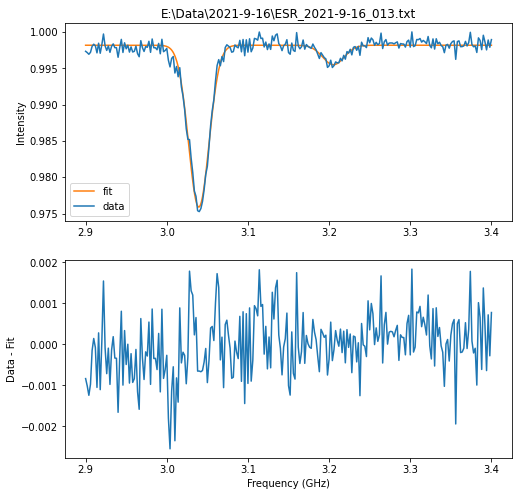

Satisfied with fit? [y/n]: y


In [26]:
prompt= 'Satisfied with fit? [y/n]: '
for f in ESR_files:
    fitFilePath= Path(f.replace('.txt','_fit_params.npz'))
    repeat= True
    while(repeat):
        xVals,yVals,errVals= readFile(f)
        yVals/= np.max(yVals)
#         plt.plot(xVals,yVals)
#         plt.xlabel('Frequency')
#         plt.ylabel('Contrast')
#         fg= go.FigureWidget([go.Scatter(x= xVals, y= yVals)])
#         fg.layout.xaxis.title= "Frequency [GHz]"
#         fg.layout.yaxis.title= "Contrast"
#         fg.show()
        copy('1,-0.001,0.01,3.05,-0.001,0.01,3.2')
        pOpt,pCov,rVals= fit_file(f,fit_function=gauss_fit_c)
        if pOpt is None:
            repeat= False
            continue
        plt.show()
        plt.close('all')
        try:
            repeat= {"n":True,"y":False,"no":True,"yes":False,"":True}[input(prompt).lower()]
        except:
            repeat= True

 Fitting the last ESR Spectrum

Enter initial parameters separated by comma (leave blank and press enter if you want to skip this fit):
Background,A_peak1,sigma_peak1,x0_peak1,... 
1,-0.001,0.001,3.55
[ 1.00e+00 -1.00e-03  1.00e-03  3.55e+00]
Fitting to Gaussian
Fits plotted in E:\Data\2020-7-27\ESR_2020-7-27_006.png
Fits saved to E:\Data\2020-7-27\ESR_2020-7-27_006_fit_params.npz
1 peak

Center frequency: 3.5519 GHz
Fitting function:<function gauss_fit at 0x000001B0D8B23D90>
Data Filename: ESR_2020-7-27_006_fit_params.npz
R-squared value: 0.923
Center Frequencies: [3.5519482]
Shifts (MHz): 681.948 
Splittings (MHz): NaN 	
Linewdiths (MHz): [44.73633789]
Percentage Contrast: [0.19417212]
Background:0.9996312021809509
Contrast Error: [0.01108827]



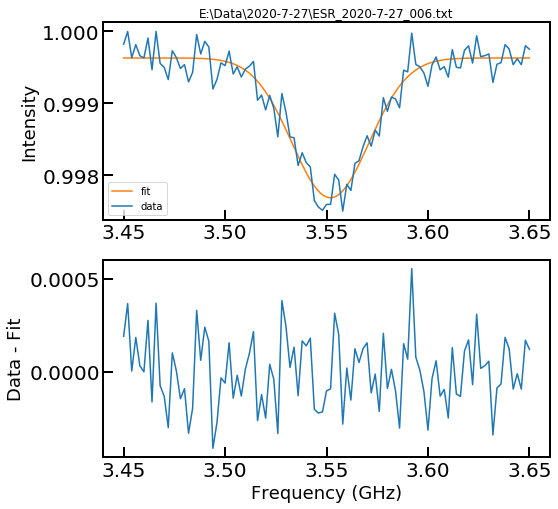

In [5]:
date= '2020-7-27' # the date on which the data was collected
ESR_files= extractESRFiles(date, makePlots= False)
fit_file(ESR_files[-1],fit_function=gauss_fit);

# Fitting ODMR spectra

<Figure size 432x288 with 0 Axes>

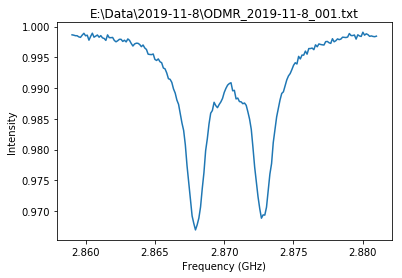

<Figure size 432x288 with 0 Axes>

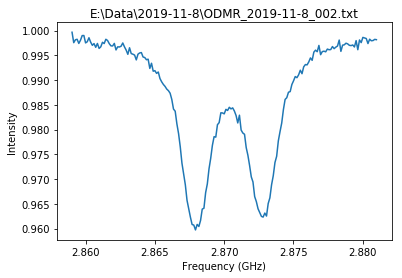

<Figure size 432x288 with 0 Axes>

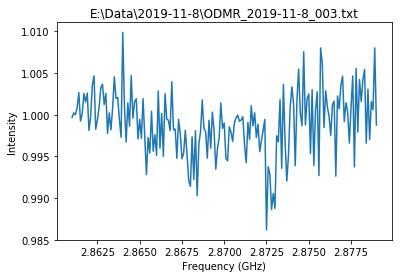

<Figure size 432x288 with 0 Axes>

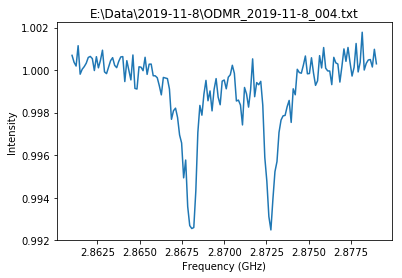

In [7]:
date= '2019-11-8' # the date on which the data was collected
ODMR_files= extractODMRFiles(date, makePlots=True)

In [4]:
print(ODMR_files)

['E:\\Data\\2019-11-5\\ODMR_2019-11-5_001.txt', 'E:\\Data\\2019-11-5\\ODMR_2019-11-5_002.txt', 'E:\\Data\\2019-11-5\\ODMR_2019-11-5_003.txt']


In [6]:
if not(len(ODMR_files) is 1):
    indices= np.fromstring(input('Enter the indices of the files to be fit:'),sep=',',dtype=int)
    ODMR_files= [ODMR_files[i-1] for i in indices]
    print('Selected ODMR files to be fit!')
for f in ODMR_files:
    print(f)

Enter the indices of the files to be fit:8
Selected ODMR files to be fit!
D:\Data\2019-1-20\ODMR_2019-1-20_008.txt


## Combine all ODMR Rounds on a current measurement

In [ ]:
date= '2018-5-6'
extractODMRFiles(date,excludeRounds=False,makePlots=False)

In [ ]:
date= '2018-5-6'
data= 'Data001'
l1= extractODMRFiles(date,excludeRounds=False,makePlots=False)
round_files= [fl for fl in l1 if (data in fl and 'Round' in fl)]
#date= '2018-3-30'
#data= 'Data006'
#l2= extractODMRFiles(date,excludeRounds=False,makePlots=False)
#l2= [fl for fl in l2 if (data in fl and 'Round' in fl)]
#round_files= l1+l2
xVals1,yVals1,errVals= combineFiles(round_files)
plt.errorbar(xVals1,yVals1)#,yerr=errVals)
plt.xlabel('Frequency (GHz)')
plt.ylabel('Counts')
plt.title('Combined ODMR for NV7')
ax= plt.gca()

In [ ]:
pOpt,pCov,rVal,pltX,pltFit= fit_file(xVals1,yVals1,fit_function=rel_lor_fit)

Fitting the last ODMR spectrum

In [ ]:
date= '2018-9-27' # the date on which the data was collected
ODMR_files= extractODMRFiles(date, makePlots= False)
fit_file(ODMR_files[-1]);

# Read Rabi File

<Figure size 432x288 with 0 Axes>

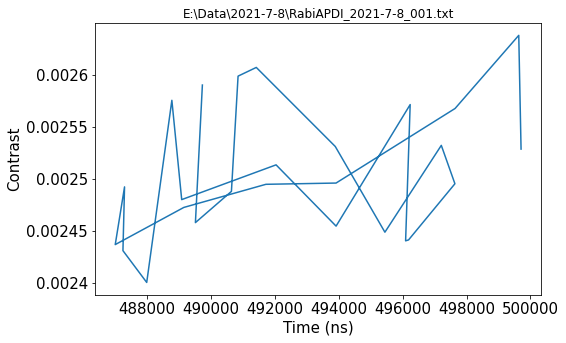

<Figure size 432x288 with 0 Axes>

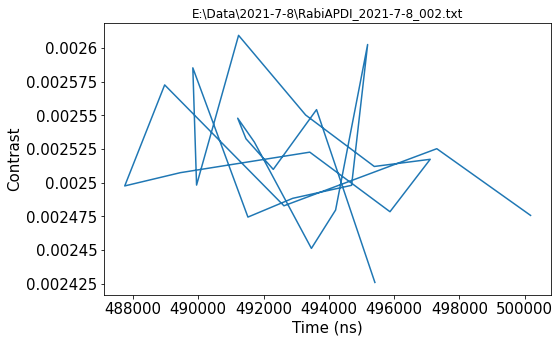

<Figure size 432x288 with 0 Axes>

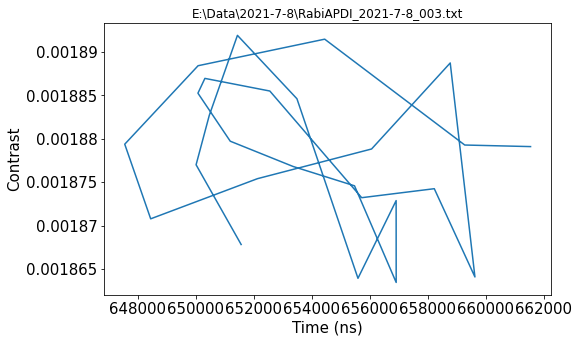

E:\Data\2021-7-8\RabiAPDI_2021-7-8_001.txt
E:\Data\2021-7-8\RabiAPDI_2021-7-8_002.txt
E:\Data\2021-7-8\RabiAPDI_2021-7-8_003.txt


In [3]:
date= '2021-7-8' # the date on which the data was collected
Rabi_files= extractRabiFiles(date,makePlots=True)
for f in Rabi_files:
    print(f)

In [11]:
def rabi(x,A,gamma,w,phi, B):
    return A*np.cos(w*x + phi)*np.exp(-gamma*x)+B

3.321 GHz:
Omega: (2*pi)*9.1 MHz
T2*: 891.3 ns



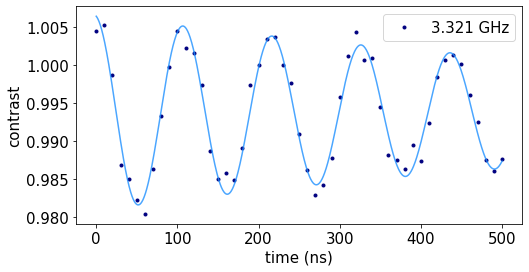

In [13]:
Rabi_files= [r'E:\Data\2021-9-1\RabiAPDI_2021-9-1_007.txt'
             ]
plt.figure(figsize= (8,4))
for f,lbl,clr1,clr2 in zip(Rabi_files,['3.321 GHz', '2.828 GHz'],['navy','darkred'],['dodgerblue','coral']):
    t,s,r= readRabiAPDFile(f)
    plt.plot(t,s/r,'.', label= lbl, linewidth= 2, alpha= 1,color= clr1)
    p0 = [5e-3,0.001,0.05,0,0.99]
    pOpt,pCov= opt.curve_fit(rabi,t,s/r,p0)
    tVals= np.linspace(np.min(t),np.max(t),1000)
    yFit= rabi(tVals,*pOpt)
    plt.plot(tVals,yFit,color= clr2, alpha= 0.8)
    print('%s:\nOmega: (2*pi)*%1.1f MHz\nT2*: %1.1f ns\n'%(lbl,pOpt[2]*1e3/(2*np.pi),1/pOpt[1]))

plt.xlabel('time (ns)',fontsize= 15)
plt.ylabel('contrast',fontsize= 15)
plt.legend(fontsize= 15)
plt.tick_params(labelsize= 15)

# Splittings, Shiftings, Linewidths

Getting fit statistics for ESR files. The following code will give you the splitting, shifting and linewidth for all the fits made on a single date. 

In [ ]:
date= '2018-1-28' # the date on which the data was collected
folderpath= join('C:\Data',date)
ESR_fit_files= [join(folderpath,f) for f in listdir(folderpath) 
            if (isfile(join(folderpath,f)) and 'ESRData' in f and '.npz' in f and not('BackUpData' in f))]

In [ ]:
for f in ESR_fit_files:
    template= 'Data Filename: %s\nR-squared value: %s\nResonance Frequencies: %s\nShifts (MHz): %s\nSplittings (MHz): %s\nLinewdiths (MHz): %s\nAmplitudes: %s\nBackground: %s'
    resFreq,shift,split,linewidth,rVal,amplitude,bckgnd= computeShifts(f)
    datSet= f.split('\\')[-1]
    print(template%(datSet,rVal,str(resFreq),shift,split,str(linewidth),str(amplitude),str(bckgnd)))

In [ ]:
date= '2018-1-30' # the date on which the data was collected
folderpath= join('C:\Data',date)
ODMR_fit_files= [join(folderpath,f) for f in listdir(folderpath) 
            if (isfile(join(folderpath,f)) and 'ODMR' in f and '.npz' in f and not('BackUpData' in f or 'Round' in f))]

In [ ]:
for f in ODMR_fit_files:
    template= 'Data Filename: %s\nR-squared value: %s\nResonance Frequencies: %s\nShifts (MHz): %s\nSplittings (MHz): %s\nLinewdiths (MHz): %s\nAmplitudes: %s\nBackground: %s'
    resFreq,shift,split,linewidth,rVal,amplitudes,bckgnd= computeShifts(f)
    datSet= f.split('\\')[-1]
    print(template%(datSet,rVal,str(resFreq),shift,split,str(linewidth),str(amplitudes),str(bckgnd)))

# Reading and Plotting Track Logs

In [ ]:
date= '2018-5-3'
dataNum= '001'
dataType= 'ODMR'
trackfileName= 'C:/Data/{0}/{1}Data_{0}_TrackLog{2}.txt'.format(date,dataType,dataNum)
xVals,yVals,zVals,countVals= readTrackFile(trackfileName)

In [ ]:
numTracks= len(xVals)
indexVals= np.arange(numTracks)
fig,ax= plt.subplots(2,2,figsize=(15,10))
ax[0,0].plot(xVals,'ro')
ax[0,0].set_title('X Tracking Values')
ax[0,1].plot(yVals,'bo')
ax[0,1].set_title('Y Tracking Values')
ax[1,0].plot(zVals,'go')
ax[1,0].set_title('Z Tracking Values')
ax[1,1].plot(countVals,'ko')
ax[1,1].set_title('Count Tracking Values')
fig.suptitle(trackfileName)
plt.show()

In [ ]:
fnames= [r'D:/Data/2018-9-27/ESR_2018-9-27_027.txt',r'D:/Data/2018-9-28/ODMR_2018-9-28_001.txt',r'D:/Data/2018-9-28/ODMR_2018-9-28_002.txt',r'D:/Data/2018-9-28/ODMR_2018-9-28_004.txt']
for i,f in enumerate(fnames):
    xVals,yVals,errVals= readFile(f)
    color= {0:'b',1:'r',2:'r',3:'r'}[i]
    plt.plot(xVals,yVals/np.max(yVals),color= color)